# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [579]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## Exploratory Data Analysis 

In [580]:
# loading csv data to dataframe 
df = pd.read_csv('data/Advertising.csv')
# checking out the Data
df.head(10)

,Unnamed: 0,TV,radio,newpaper,sales
0,0,230.1,37.8,6s9.2,22100.0
1,1,44.5,39.3,45.1,10400.0
2,2,17.2,45.9,69.3,9300.0
3,3,151.5,41.3,58.5,18500.0
4,4,180.8,10.8,58.4,12900.0
5,5,8.7,48.9,75.0,7200.0
6,6,57.5,32.8,23.5,11800.0
7,7,120.2,19.6,11.6,13200.0
8,8,8.6,2.1,1.0,4800.0
9,9,199.8,2.6,21.2,10600.0


In [581]:
df = df.drop('Unnamed: 0', axis=1)
df = df.rename(columns={'newpaper': 'newspaper'})
df['newspaper'] = pd.to_numeric(df['newspaper'], errors='coerce')
# Eliminar la fila con el valor faltante en 'newspaper'
df = df.dropna()

In [582]:
df.head()

,TV,radio,newspaper,sales
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
5,8.7,48.9,75.0,7200.0


In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 1 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         199 non-null    float64
 1   radio      199 non-null    float64
 2   newspaper  199 non-null    float64
 3   sales      199 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [584]:
df.describe()

,TV,radio,newspaper,sales
count,199.000000,199.000000,199.000000,199.000000
mean,146.625126,23.190955,30.359799,13981.909548
std,85.867111,14.848182,21.659246,5198.861022
min,0.700000,0.000000,0.300000,1600.000000
25%,74.050000,9.950000,12.700000,10350.000000
50%,149.700000,22.500000,25.600000,12900.000000
75%,218.450000,36.400000,44.700000,17350.000000
max,296.400000,49.600000,114.000000,27000.000000


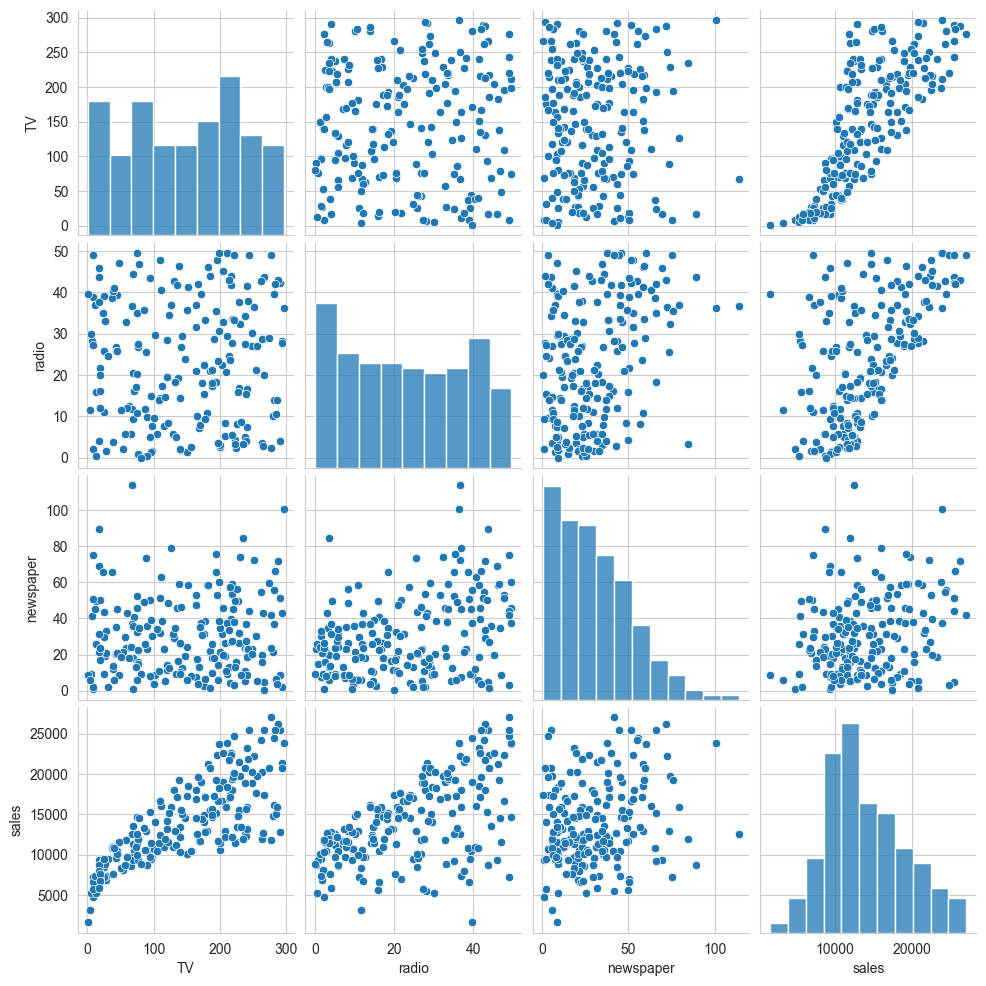

In [585]:
sns.pairplot(df);

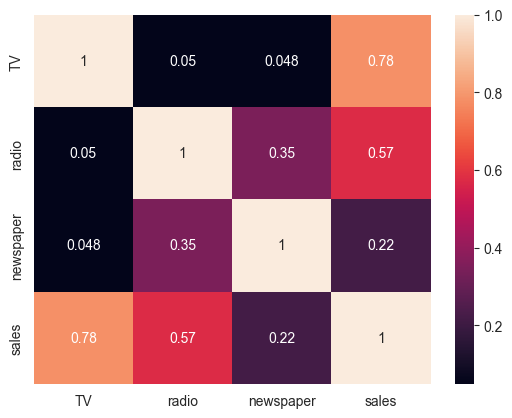

In [586]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

## Modelado

In [587]:
# Columns as Features
X = df[['TV', 'radio', 'newspaper']]
X

,TV,radio,newspaper
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [588]:
# sales objetivo que tratamos de predecir
y = df['sales']
y

1      10400.0
2       9300.0
3      18500.0
4      12900.0
5       7200.0
        ...   
195     7600.0
196     9700.0
197    12800.0
198    25500.0
199    13400.0
Name: sales, Length: 199, dtype: float64

In [589]:
from sklearn import linear_model, metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [591]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(159, 3)
(40, 3)
(159,)
(40,)


In [592]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))
#print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

Train MSE: 2872614.923945353
Test MSE: 2520107.840150608


In [593]:
print(lr.intercept_)
print(lr.coef_)

2660.4342930761995
[ 46.90895387 188.96744505   0.21571305]


In [594]:
coeff_df = pd.DataFrame(lr.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
TV,46.908954
radio,188.967445
newspaper,0.215713


In [595]:
ridgeR = Ridge(alpha = 0.001)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 2872614.92
Test MSE sin regularización: 2520107.84
Train MSE con regularización: 2872614.92
Test MSE con regularización: 2520107.83


In [596]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 
print(np.min(alphas))
print(np.max(alphas))

0.0001
1000.0


In [597]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas) 

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [598]:
min(err_ridge)

np.float64(2516582.4763425738)

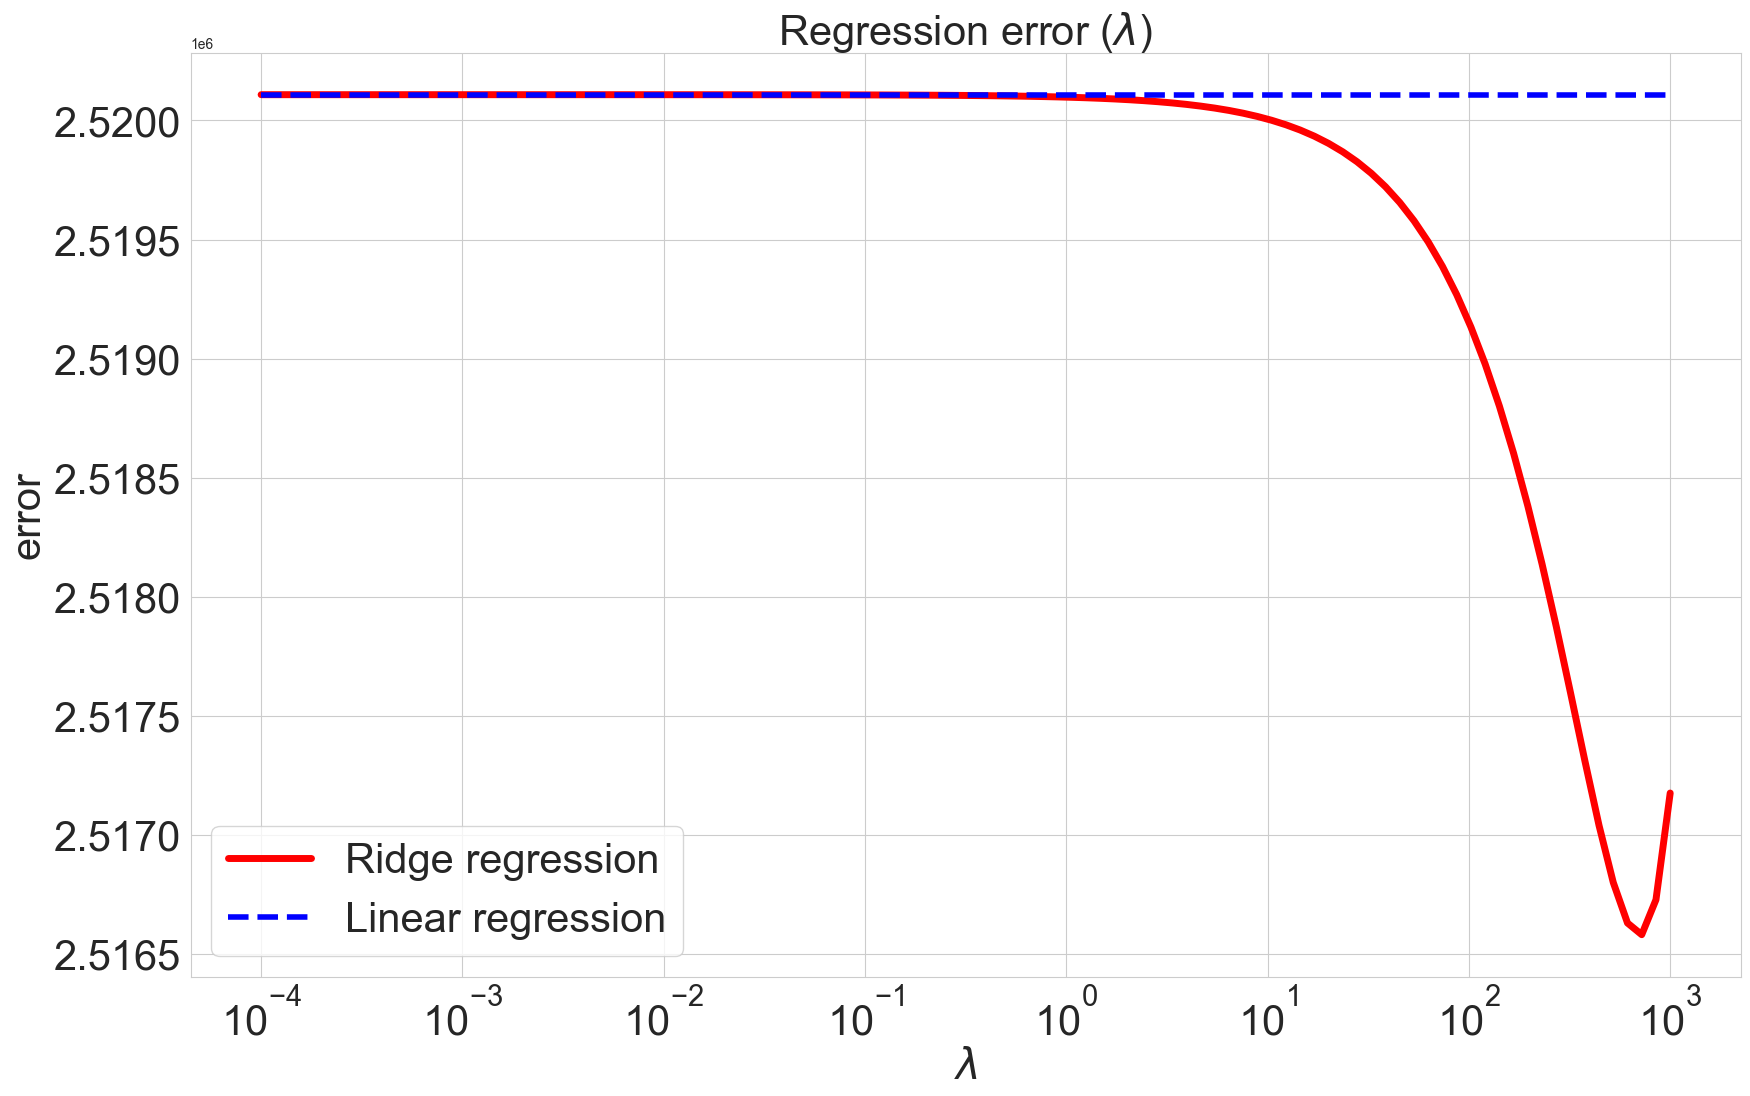

In [599]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [600]:
# Train the model  
ridgeR = Ridge(alpha = 28) 
ridgeR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))

Train MSE: 2872620.7193
Test MSE: 2519824.6131


In [601]:
np.shape(coef_ridge)

(100, 3)

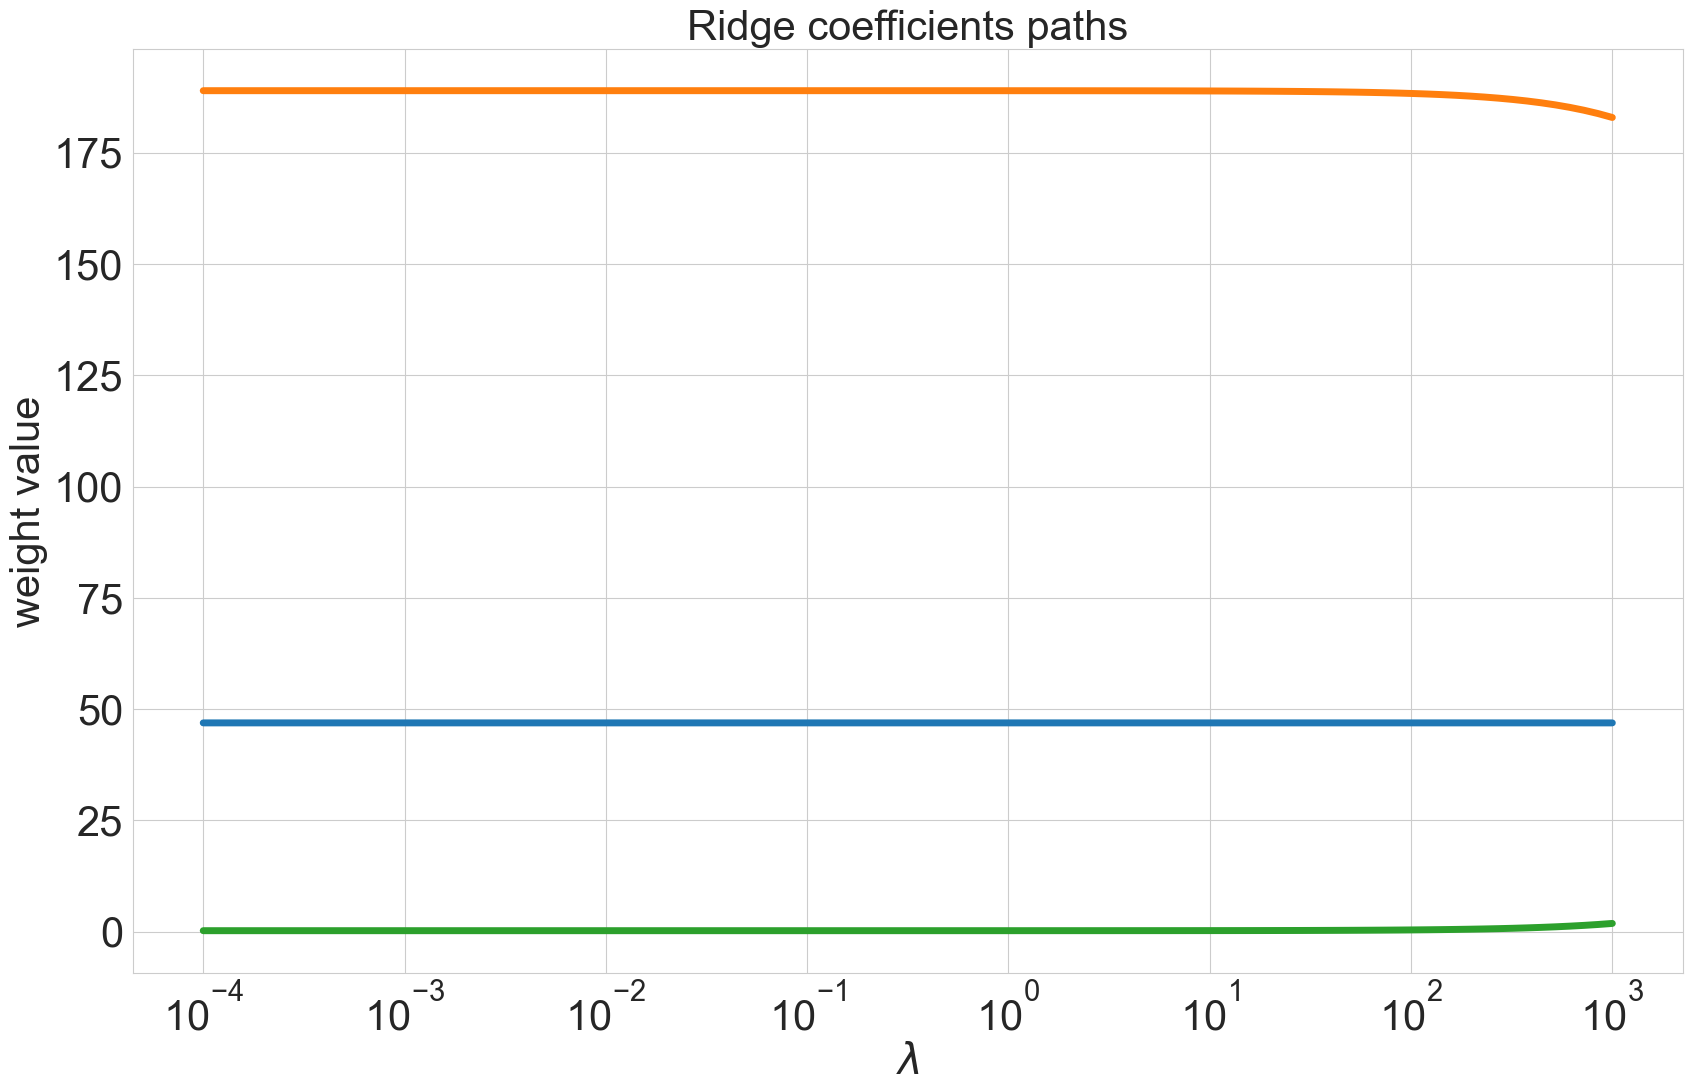

In [602]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, coef_ridge, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title('Ridge coefficients paths', fontsize=30)
plt.show()

In [603]:
lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 2872614.92
Test MSE sin regularización: 2520107.84
Train MSE: 2872614.9240
Test MSE: 2520103.9539


In [604]:
lasso = linear_model.Lasso(fit_intercept=False)

coef_lasso = []
err_lasso = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

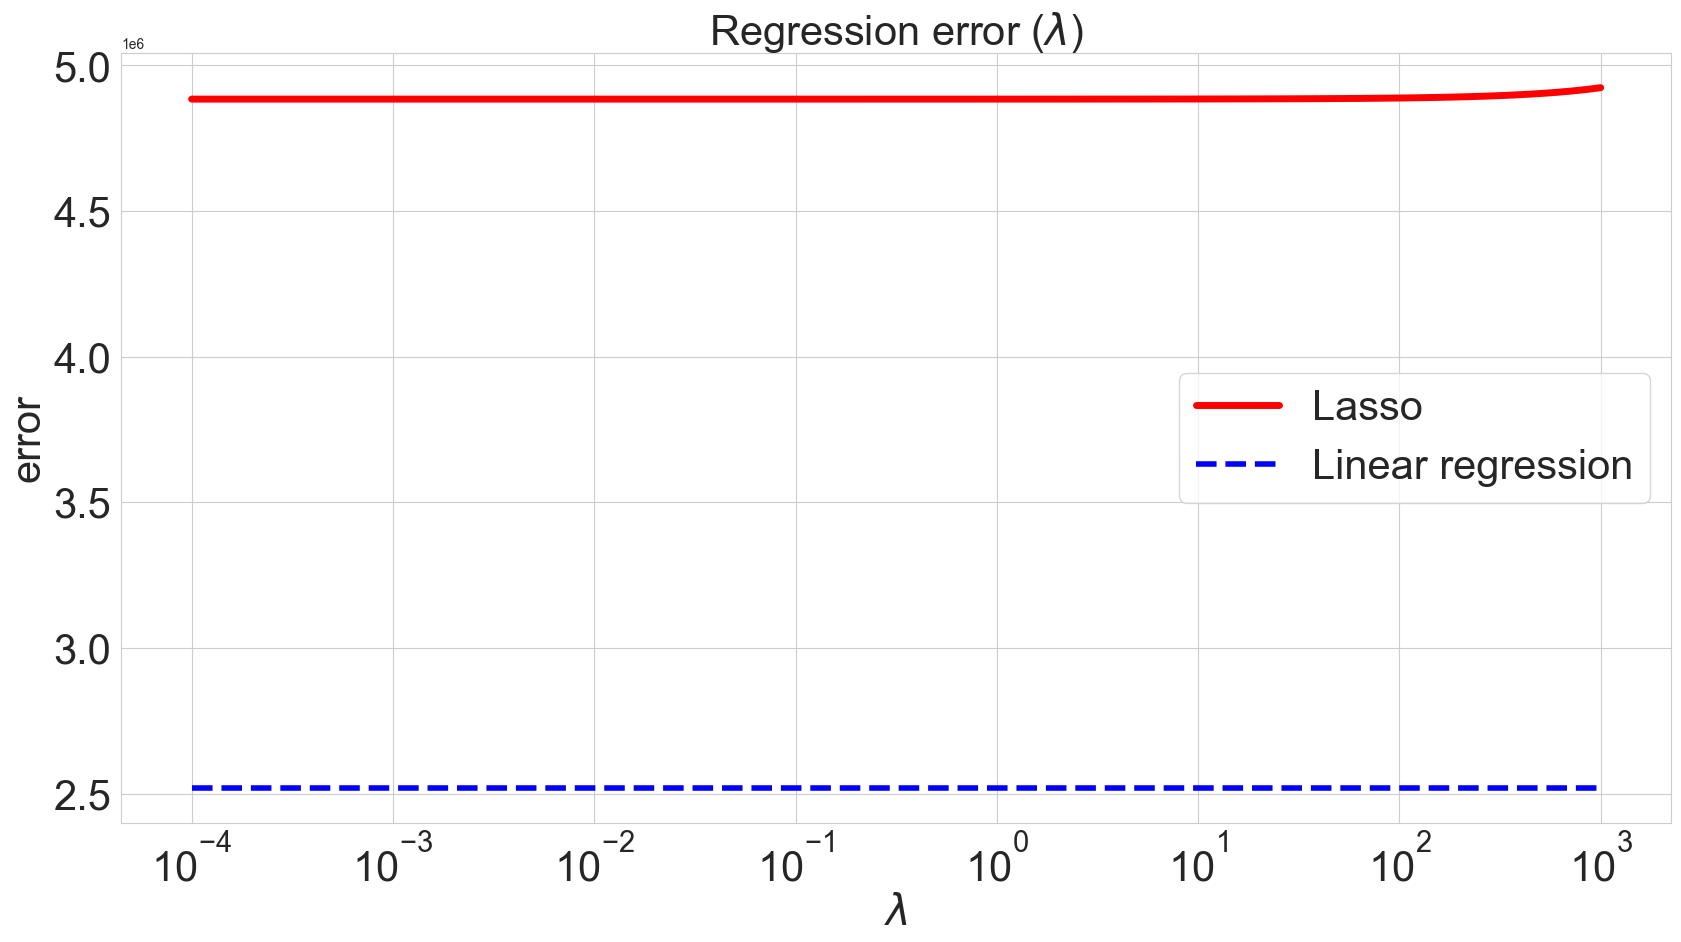

In [605]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [606]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 2872614.9239
Test MSE: 2520107.0633


In [607]:
print("Test MAPE: %0.4f" % metrics.mean_absolute_percentage_error(y_test, lassoR.predict(X_test)))

Test MAPE: 0.1209


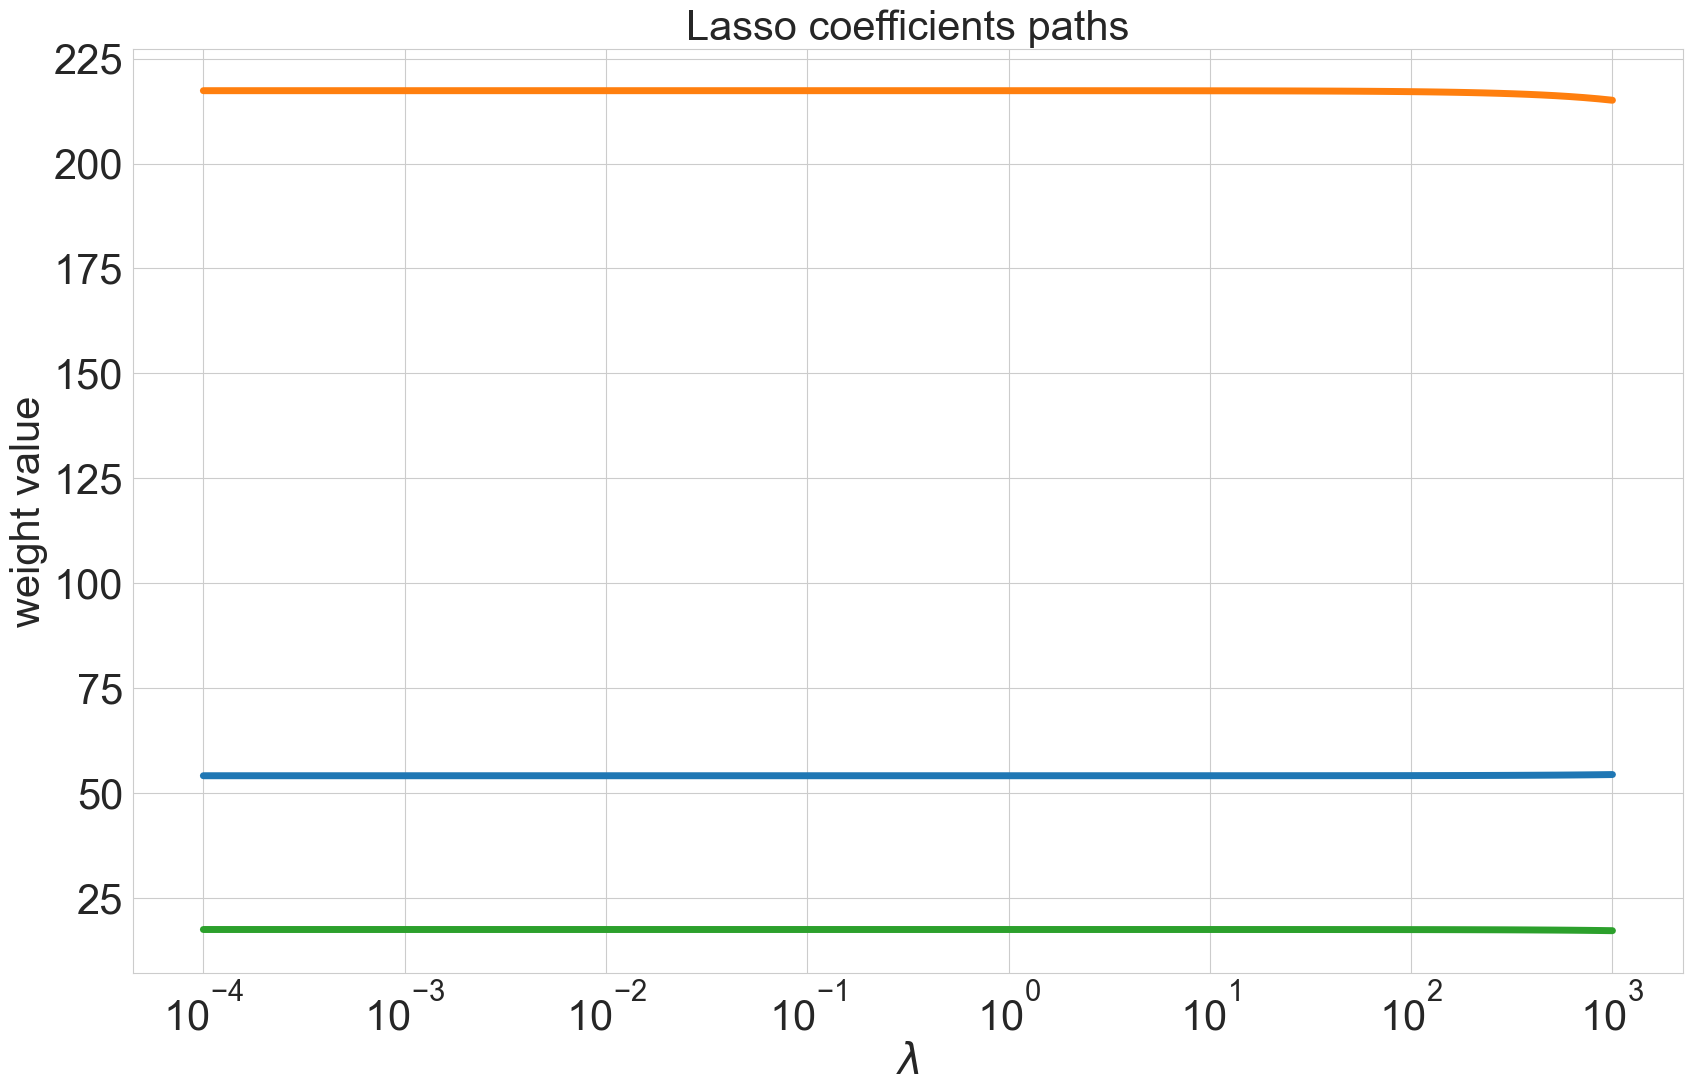

In [608]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, coef_lasso, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title('Lasso coefficients paths', fontsize=30)
plt.show()

In [609]:
elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 2872661.8271
Test MSE: 2519316.8645


In [610]:
np.random.randint(0,1,100)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [611]:
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=1)
    elastic_net.fit(X_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(X_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)
    

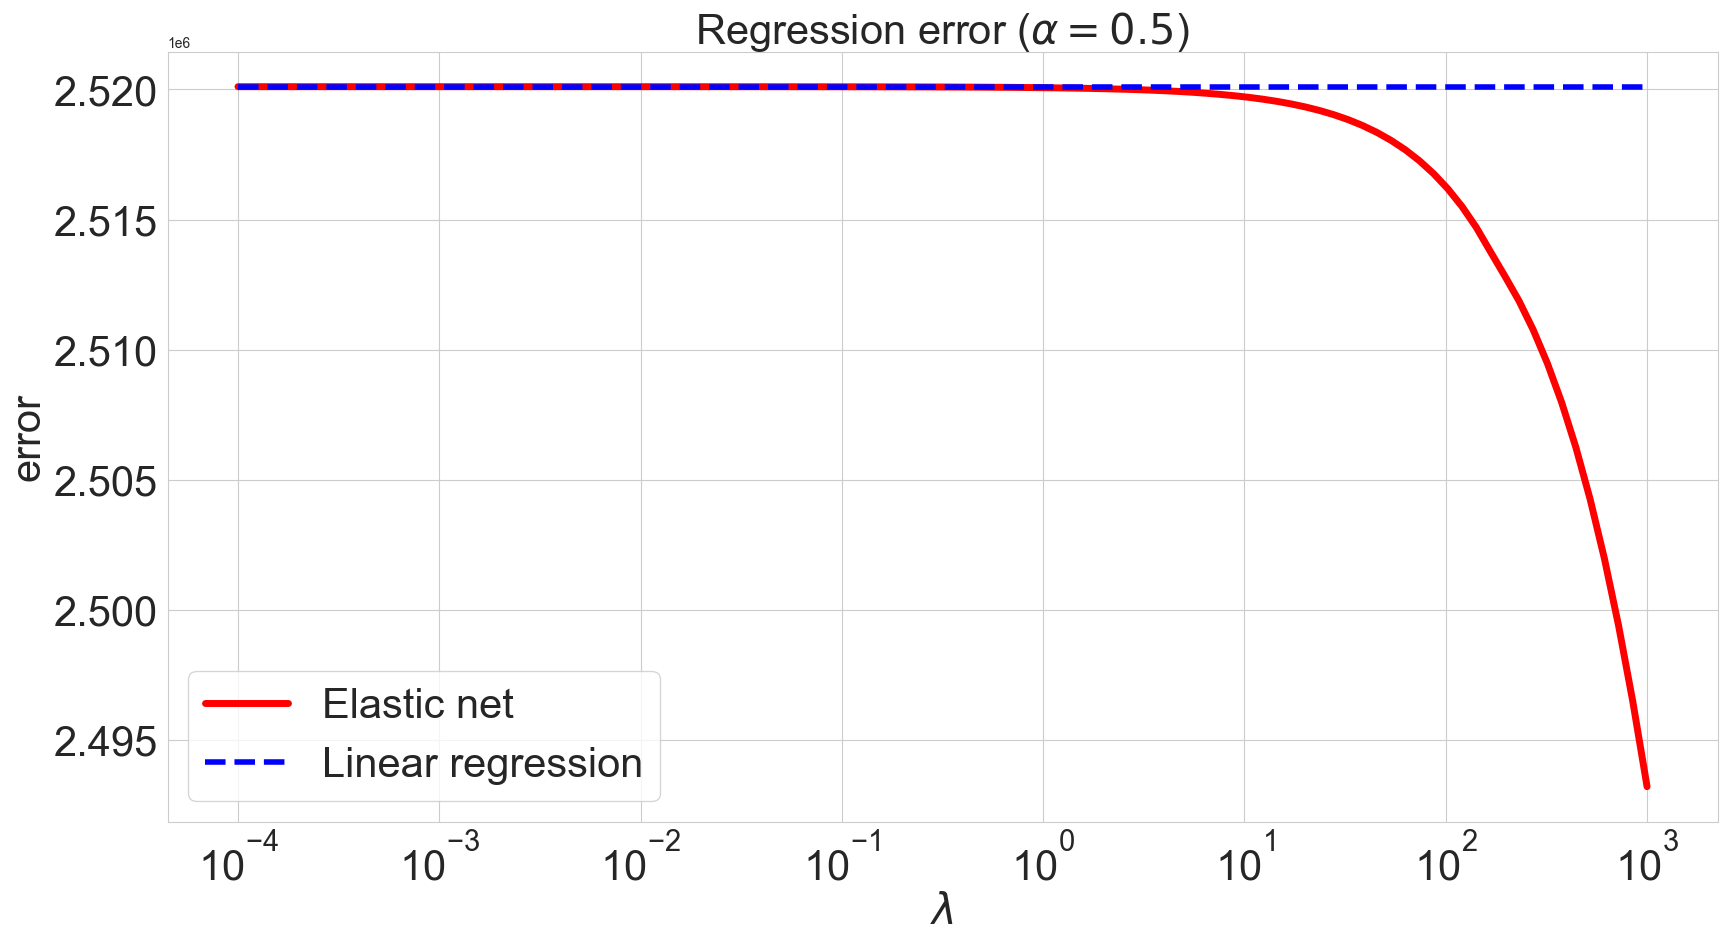

In [612]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alphas, err_eln, linewidth=5, color='red', label="Elastic net")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('error', fontsize=30)
ax.legend(fontsize=30)
plt.title(r'Regression error ($\alpha=0.5$)', fontsize=30)
plt.show()

In [613]:
elastic_net = ElasticNet(alpha = 30, l1_ratio=0.5)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 2908728.5520
Test MSE: 2533384.8800


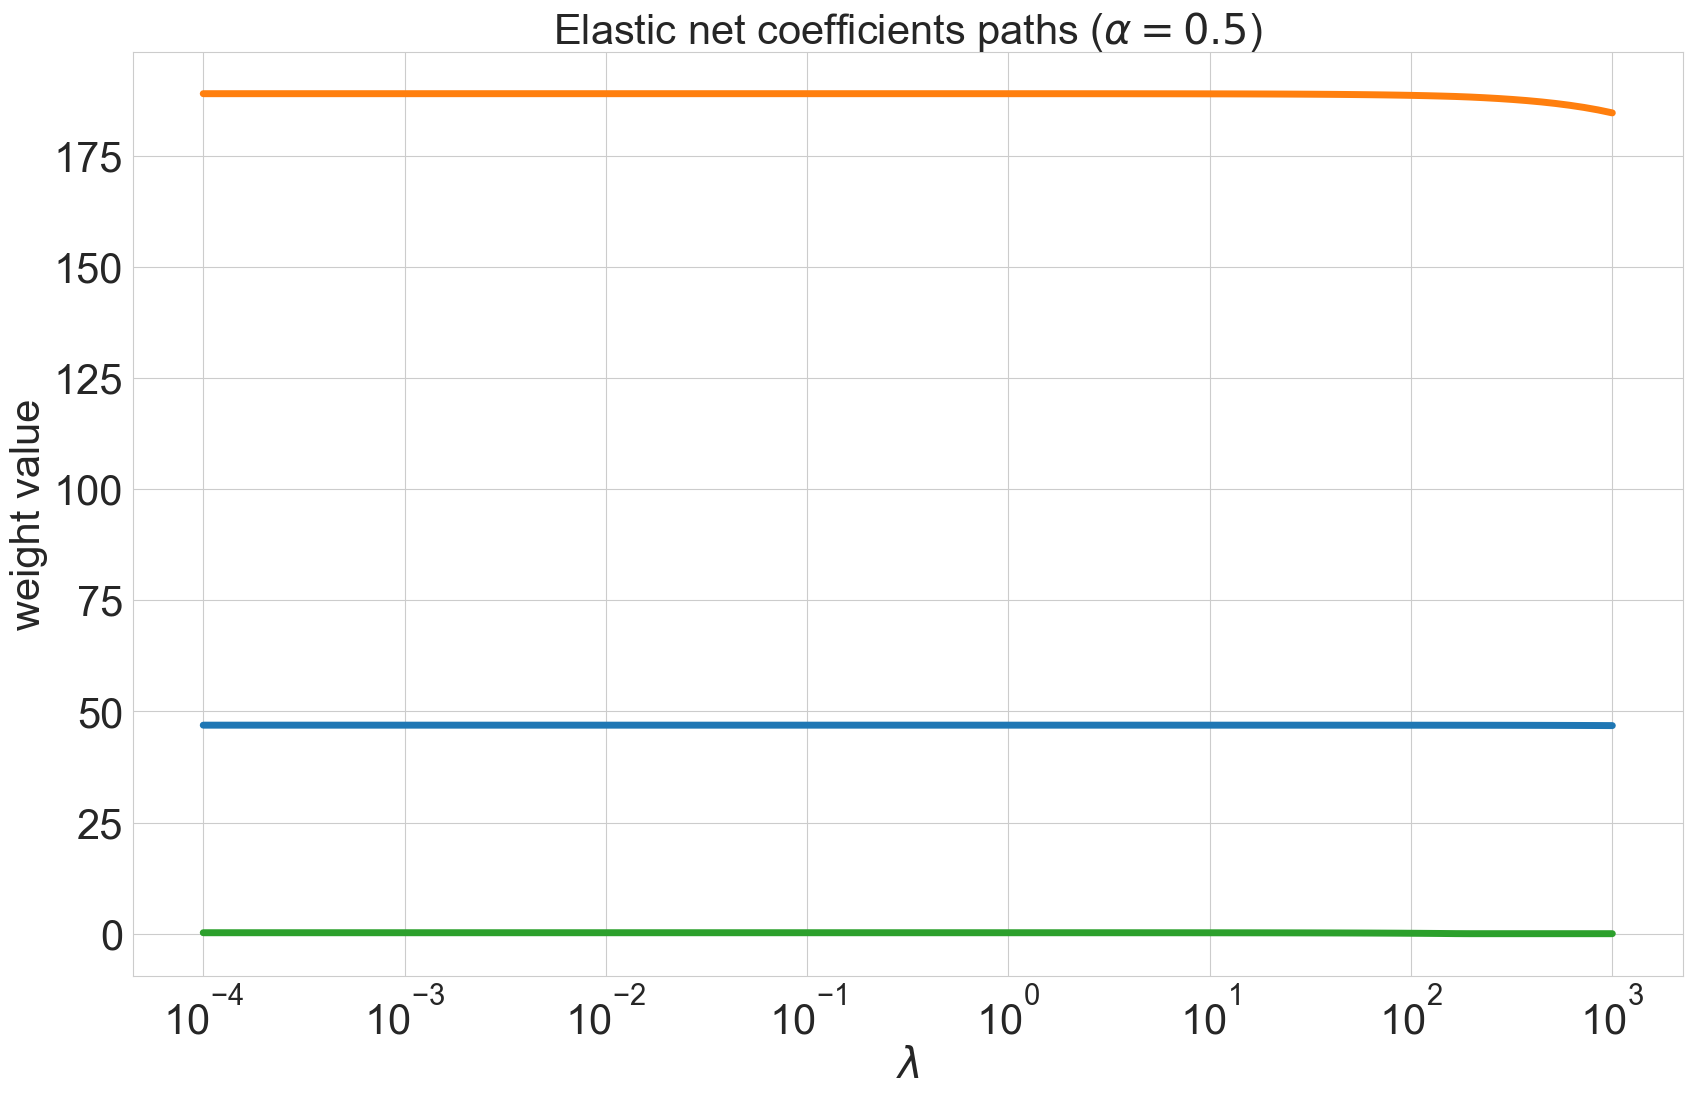

In [614]:
plt.figure(figsize=(20,12))
ax = plt.gca()
ax.plot(alphas, coef_eln, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('weight value', fontsize=30)
plt.title(r'Elastic net coefficients paths ($\alpha=0.5$)', fontsize=30)
plt.show()

sales = intercept + coef*TV + coef1*radio + coef2*newspaper  
sales = 2660.4342930761995 + 46.908954*TV + 188.967445*radio + 0.215713*newspaper

In [615]:
print(elastic_net.intercept_)
print(elastic_net.coef_)

2878.0936341451434
[ 46.89949867 175.20657772   3.83483906]


In [616]:
coeff_df = pd.DataFrame(elastic_net.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
TV,46.899499
radio,175.206578
newspaper,3.834839


In [617]:
def calculate_sales(TV, radio, newspaper):
    sales = 2878.0936341451434 + 46.89949867 * TV + 175.20657772 * radio + 3.83483906 * newspaper
    return sales

In [618]:
# Publicidad radio
tv_investment = 0  # Inversión en TV
radio_investment = 1  # Inversión en radio
newspaper_investment = 0  # Inversión en periódicos

predicted_sales = calculate_sales(tv_investment, radio_investment, newspaper_investment)

# Restar el valor ventas base
valor_a_restar = 2660.4342930761995
adjusted_sales = predicted_sales - valor_a_restar

# Imprimir los resultados
print(f"Predicción de ventas antes de restar: {predicted_sales:.2f}")
print(f"Predicción de ventas después de restar: {adjusted_sales:.2f}")

Predicción de ventas antes de restar: 3053.30
Predicción de ventas después de restar: 392.87


In [619]:
# Publicidad tv y periodico
tv_investment = 1  # Inversión en TV
radio_investment = 0  # Inversión en radio
newspaper_investment = 1  # Inversión en periódicos

predicted_sales = calculate_sales(tv_investment, radio_investment, newspaper_investment)

# Restar el valor ventas base
valor_a_restar = 2660.4342930761995
adjusted_sales = predicted_sales - valor_a_restar

# Imprimir los resultados
print(f"Predicción de ventas antes de restar: {predicted_sales:.2f}")
print(f"Predicción de ventas después de restar: {adjusted_sales:.2f}")

Predicción de ventas antes de restar: 2928.83
Predicción de ventas después de restar: 268.39


# (Explicación contaminación entre train y test)

No se que decir aqui????

## Resultados

In [620]:
print("Linear regression error:   %0.4f" % baseline_error)    
print("Minimun ridge error:       %0.4f" % min(err_ridge))
print("Minimum lasso error:       %0.4f" % min(err_lasso))
print("Minimum elastic net error: %0.4f" % min(err_eln))

Linear regression error:   2520107.8402
Minimun ridge error:       2516582.4763
Minimum lasso error:       4884328.9948
Minimum elastic net error: 2493206.6846
